# Импорт библиотек

In [11]:
# Every day
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/istrazov/Documents')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# String
import re # RegEx

# Time series
import time
import datetime

# File format
import csv
import json

# Model
import statsmodels
import sklearn

# Neural Network
import torch

# Computer vision
import skimage
import pylab

# Specific
import sympy as sp
import pandas_profiling # Cool pandas data report
import pymssql # MS SQL
import pipenv # Virtual enviroment
from tqdm import tqdm # Progress bar
import import_ipynb # Import .ipynb


# Мб пригодится
cwd = os.getcwd()
sns.__version__

# Графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# Stopping Warnings
import warnings
warnings.simplefilter('ignore')

# Настройки вывода pandas
display_settings = {
    'max_columns': 500,
    'expand_frame_repr': True,
    'max_rows': 500,
    'width': 1000,
    'precision': 2,
    'show_dimensions': True
}

for op, value in display_settings.items():
    pd.set_option("display.{}".format(op), value)

'0.9.0'

# Режимы работы с файлами

- r (read) - открыть для чтения (по уммолчанию)
- w (write) - открыть для записи, содержимое файла стирается
- a (append) - открыть для записи, запись ведется в конец
- b (binary) - открыть в бинарном виде
- t (text) - открыть в текстовом режиме (по умолчанию)
- r+ - открыть для чтения и записи
- w+ - откртыь для чтения и записи, содержимое файла стирается

# Загрузка данных

### Функции

In [ ]:
pd.read_csv() # Разделитель ','

pd.read_table() # Разделитель '\t'

pd.read_fwf() # Фиксированная ширина столбцев

pd.read_clipboard() # Данные из буфера обмена

### Аргументы

In [ ]:
# Разделитель по столбцам
sep = {',', ';', '\t', '\n', '', '|', '\s+'}

# Разделитель дробных чисел
decimal = {'.', ','}
thousands = {'.', ','}

# Кодировка
encoding = {'utf-8', 'cp1251', 'cp855', 'cp866', 'koi8-r', 'iso8859_5', 'mac_cyrillic'}
#https://docs.python.org/3/library/codecs.html#standard-encodings

# Заголовки столбцев
header = {True, False}

# Названия столбцев
names = ['col1', 'col2']

# Столбец индексов
index_col = {0, "name"}

# Пропуск строк
skiprows = []

# Обозначение NA в файле
na_values = ['NULL']

# Обозначение комментария в файле
comment = ['--', '#']

# Ковертер столбцев по функции
converters = {'foo': 'f'}

# Количество читаемых строк в файле
nrows = 20

# Список используемых столбцев
usecols = [0, 1, 5]

# Реорганизация данных

### Сортировка

In [ ]:
df.sort_values()

# Name or list of names to sort by
by = ['col1', 'col2'] 

# Choice of sorting algorithm
kind = {'quicksort', 'mergesort', 'heapsort'} 

# Perform operation in-place
inplace = {False, True} 

# Axis to be sorted
axis = {0, 1} 

# Sort ascending vs. descending
ascending = {True, False} 

# Puts NaNs at the beginning or at the end
na_position = {'first', 'last'} 

# Преобразование данных

### Поиск и удаление NaN

In [ ]:
df.isnull()

df.isnull().sum()

df.isnull().sum().sum()

df.notnull()

In [ ]:
df.col1[df.col1.notnull()]

df.dropna(how = 'all' # Удаляет только если все значения в строке/столбце NaN
          how = 'any' # Удаляет если хотя бы одно значение в строке/столбце NaN
          thresh = 5 # Удаляет если 5 или больше значений в строке/столбце NaN
          axis = 1 # Удаляем столбцы
          )

### Игры с индексами и размерностью

In [ ]:
.reset_index()
.wide_to_long()
.to_records()

### Удаление дубликатов

In [ ]:
df.duplicated()

df.drop_duplicates()

In [ ]:
# Ключ дублирования
['col1', 'col2']

# Оставляемый дубликат
keep = {'last'}

# Замена датафрейма
inplace = {True, False}

### Разбиение на отрезки

In [4]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

In [5]:
ages_cut = pd.cut(ages, bins)

In [11]:
ages_cut.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [12]:
ages_cut.get_values()

array([Interval(18, 25, closed='right'), Interval(18, 25, closed='right'),
       Interval(18, 25, closed='right'), Interval(25, 35, closed='right'),
       Interval(18, 25, closed='right'), Interval(18, 25, closed='right'),
       Interval(35, 60, closed='right'), Interval(25, 35, closed='right'),
       Interval(60, 100, closed='right'),
       Interval(35, 60, closed='right'), Interval(35, 60, closed='right'),
       Interval(25, 35, closed='right')], dtype=object)

In [13]:
ages_cut.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# YuoTube

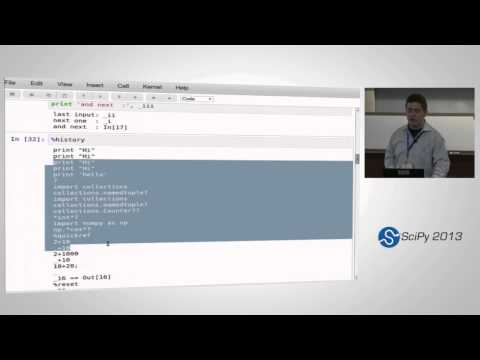

In [49]:
from IPython.display import YouTubeVideo

YouTubeVideo('xe_ATRmw0KM')

# Profile (pandas report)

In [9]:
pip install pandas_profiling
import pandas as pd
import pandas_profiling
pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv').profile_report()

# Matplotlib

### color

In [ ]:
'k' - black
'g' - green
'b' - blue
'r' - red

### linestyle

In [ ]:
'-' - dashes
's' - squares
'^' - triangles

### marker

In [ ]:
'o'
'+'
','
'.'
'1'

### drawstyle

In [ ]:
steps-post

# SimpleTable

In [48]:
from statsmodels.iolib.table import SimpleTable
row =  ['JB', 'p-value', 'skew', 'kurtosis']
a = [['1.5', '2.5', '3.5', '4.5']]
print(SimpleTable(a, row))

 JB p-value skew kurtosis
-------------------------
1.5     2.5  3.5      4.5
-------------------------


# Regular Expression

In [ ]:
. ^ $ * + ? { } [ ] \ | ( ) — метасимволы

[ ] — можно указать множество подходящих символов

^ - карет, обозначает либо начало строки, либо инвертирование группы символов. (например: "^[^0-9]" — не-цифра в начале строки).

\d ~ [0-9] — цифры

\D ~ [^0-9]

\s ~ [ \t\n\r\f\v] — пробельные символы

\S ~ [^ \t\n\r\f\v]

\w ~ [a-zA-Z0-9_] — буквы + цифры + _

\W ~ [^a-zA-Z0-9_]

In [ ]:
re.IGNORECASE
re.DEBUG

# Pipenv

In [ ]:
Command line:
> '~/python.exe' -m venv env_name
> cd C:\env_name\Scripts
> activate

# Telegram Bot

In [ ]:
# Установка модуля
pip install telegram-send

# Подключение к боту
telegram-send --configure
944911099:AAHRdFNB1D3Kd20ejF4d9F2x7byU943RhHU

# Отправка сообщения
!telegram-send 'Hello_world!'

# Datetime

In [1]:
from datetime import datetime

In [2]:
# Текущее время

datetime.now()

datetime.datetime(2019, 11, 29, 18, 41, 4, 387667)

In [3]:
# Объект timedelta

datetime.now() - datetime(2019, 11, 10)

datetime.timedelta(days=19, seconds=67265, microseconds=235849)

In [5]:
# Перевод из строки
print(datetime.strptime('2019-11-22', '%Y-%m-%d'))

# Перевод в строковый формат

print(str(datetime.now()))
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2019-11-22 00:00:00
2019-11-29 18:41:11.707317
2019-11-29 18:41:11


In [ ]:
# Спецификаторы datetime

%Y - год(4)
%y - год(2)
%m - месяц
%d - день
%H - час(24)
%h - час(12)
%M - минута
%S - секунда
%w - номер дня недели
%U - номер недели (с воскресенья)
%W - номер недели (с понедельника)
%z - часовой пояс
%F - %Y-%m-%d
%D - %m/%d/%y

# Спецификаторы, зависящие от локали

%a - сокращенное название дня недели
%A - полное название дня недели
%b - сокращенное название месяца
%B - полное название месяца
%c - полная дата и время
%p - AM/PM
%x - дата в формате локали
%X - время в формате локали

# Computer Vision

In [ ]:
from skimage.io import imread
import pylab

image = imread('image.jpg') # Real image to numpy array with shape=(m, n, 3)
pylab.imshow(image); # Show image

image = sk.img_as_float(image) # RGB to [0,1]

In [ ]:
# Image-array (m,n,3) to X-vector (m*n,3) and y-vector (m*n)

X = image.reshape(image.shape[0]*image.shape[1], 3)
y = np.arange(1, image.shape[0]*image.shape[1]+1)

### Уменьшение количества цветов с помощью k-Means

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, init='k-means++', random_state=241).fit(X)
    
data = pd.DataFrame(X, columns=['x','y','z'])
data['cluster'] = km.predict(X)

# Mean cluster pixel
data_mean = data.groupby('cluster', as_index=False).mean()
image_mean = np.array(data.merge(data_mean, on='cluster', how='left')[['x_y','y_y','z_y']])
image_mean = image_mean.reshape(image.shape[0], image.shape[1], 3)
print('PSNR_mean:', compare_psnr(image, image_mean))
pylab.imshow(image_mean);

# Median cluster pixel    
data_med = data.groupby('cluster', as_index=False).median()
image_med = np.array(data.merge(data_med, on='cluster', how='left')[['x_y','y_y','z_y']])
image_med = image_med.reshape(image.shape[0], image.shape[1], 3)
print('PSNR_med:', compare_psnr(image, image_med))
pylab.imshow(image_med);

# Classification

### Binary Models

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log')
sgd.fit(X, y)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

### Binary to Multy

In [ ]:
# One-vs-One
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(X, y)
ovo_clf.predict(X)

# One-vs-All
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SGDClassifier())
ovr_clf.fit(X, y)
ovr_clf.predict(X)

### Multy Models

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_tree.fit(X, y)
plt.figure(figsize=(100, 50))
plot_tree(clf_tree, fontsize=80, feature_names=list(X_train), filled=True);

# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=5)
clf_forest.fit(X, y)
clf_forest.predict(X)
clf_forest.predict_proba(X)

# k Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

### Polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

### Optimisation of C (reg. parameter)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

### Cross-val score

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

### Cross-val predict

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

### Confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

### Quality metrics

$precision = \frac{TP+TN}{TP+TN+FP+FN}$

$precision = \frac{TP}{TP+FP}$

$recall = \frac{TP}{TP+FN}$

$F1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}}= 2*\frac{precision * recall}{precision + recall} = \frac{TP}{TP+\frac{FN+FP}{2}}$

In [86]:
import numpy as np
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def quality_metrics(y, y_pred):
    mv = []
    mv.append(['Accuracy', round(accuracy_score(y, y_pred), 2)])
    mv.append(['Precision', round(precision_score(y, y_pred), 2)])
    mv.append(['Recall', round(recall_score(y, y_pred), 2)])
    mv.append(['F1', round(f1_score(y, y_pred), 2)])
    
    # Metrics
    print(SimpleTable(mv, ['Metric', 'Value']))
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    cmp = cm*100/cm.sum()
    cmp = np.round_(cmp, 2)
    print(SimpleTable(np.append([['Positive_Model','Negative_Model']], cm, axis=0).T, 
                      ['Amount','Negative_Real','Positive_Real']))
    print(SimpleTable(np.append([['Positive_Model','Negative_Model']], cmp, axis=0).T, 
                      ['Percent','Negative_Real','Positive_Real']))

In [87]:
y = [1,1,1,0,0]
y_pred = [1,1,1,0,0]

quality_metrics(y,y_pred)

  Metric  Value
---------------
 Accuracy   1.0
Precision   1.0
   Recall   1.0
       F1   1.0
---------------
    Amount     Negative_Real Positive_Real
------------------------------------------
Positive_Model             2             0
Negative_Model             0             3
------------------------------------------
   Percent     Negative_Real Positive_Real
------------------------------------------
Positive_Model          40.0           0.0
Negative_Model           0.0          60.0
------------------------------------------


### ROC & PRC

In [63]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def plot_roc_curve(model, X, y):
    y_pred = model.predict_proba(X)[:,1]
    
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y, y_pred, pos_label=1)
    
    plt.plot(fpr, tpr, lw=2, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC = {}'.format(round(auc(fpr, tpr), 2)))
    plt.show()
    
def plot_precision_recall_curve(model, X, y):
    y_pred = model.predict_proba(X)[:,1]
    
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred, pos_label=1)
    
    plt.plot(recalls, precisions, lw=2, label='PRC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('PRC-AUC = {}'.format(round(auc(recalls, precisions), 2))))
    plt.show()